# **IoMT Healthcare Risk Prediction (Excel + ML)**

## Project Phases:
1. cleaned Data importing
2. Data Preprocessing
3. Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Model Development:
6. Real-time Predictions:
7. Interpretability and Insights:


ML PROBLEM - multiclass classification problem- for given columns we need to predict the health status

## Importing all libraries

In [1]:
# import all libraries
import numpy as np
import pandas as pd


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Display matplotlib plots inside the notebook
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset and Data exploration

In [3]:
# import the file from drive onto colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# to check on which drive location dataset is
!ls /content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject

 cleaned_data.xlsx	 IoMT_Healthcare_Dataset.csv
 cleaned_IOMT_data.pkl	'IoMT Healthcare Risk Prediction (Excel + ML).ipynb'


In [5]:
# import pandas as pd
df = pd.read_excel(r'/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/cleaned_data.xlsx')
df.head()    # first 5 rows

,Patient_ID,Patient_Age,Vital_Signs_Abnormality,Previous_Diagnosis,Medication_Usage,Treatment_History,Heart_Rate_BPM,Blood_Pressure_mmHg,Systolic_BP,Diastolic_BP,Oxygen_Saturation_%,Body_Temperature_C,Blood_Glucose_mg/dL,Health_Status
0,P1000,35,Normal,None_Reported,None_Taken,Routine Checkup,77.790413,127/78,127,78,96.0,38.2,90.3,Critical
1,P1001,72,Slightly Abnormal,Diabetes,None_Taken,Routine Checkup,69.748302,135/74,135,74,93.0,36.6,138.2,At Risk
2,P1002,88,Slightly Abnormal,Diabetes,None_Taken,Surgery,67.966562,94/74,94,74,91.4,37.8,108.0,Critical
3,P1003,83,Slightly Abnormal,Hypertension,Regular,Surgery,80.977205,87/73,87,73,95.9,37.5,76.0,At Risk
4,P1004,58,Normal,Respiratory Issue,Occasional,Routine Checkup,68.997461,102/83,102,83,99.5,36.2,195.5,Critical


- The dataset has been cleaned for excel dashboard hence moving on to the next step

In [6]:
# Gives summary of the dataset like columns, number of columns, non null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2500 non-null   object 
 1   Patient_Age              2500 non-null   int64  
 2   Vital_Signs_Abnormality  2500 non-null   object 
 3   Previous_Diagnosis       2500 non-null   object 
 4   Medication_Usage         2500 non-null   object 
 5   Treatment_History        2500 non-null   object 
 6   Heart_Rate_BPM           2500 non-null   float64
 7   Blood_Pressure_mmHg      2500 non-null   object 
 8   Systolic_BP              2500 non-null   int64  
 9   Diastolic_BP             2500 non-null   int64  
 10  Oxygen_Saturation_%      2500 non-null   float64
 11  Body_Temperature_C       2500 non-null   float64
 12  Blood_Glucose_mg/dL      2500 non-null   float64
 13  Health_Status            2500 non-null   object 
dtypes: float64(4), int64(3),

In [7]:
# describe the dataset- using statistical
df.describe()

,Patient_Age,Heart_Rate_BPM,Systolic_BP,Diastolic_BP,Oxygen_Saturation_%,Body_Temperature_C,Blood_Glucose_mg/dL
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000
mean,53.477600,74.698478,119.578400,79.689200,95.006880,37.49836,134.779120
std,21.123086,10.279418,15.330632,9.988819,2.907803,0.86212,37.540374
min,18.000000,39.179374,59.000000,50.000000,90.000000,36.00000,70.000000
25%,35.000000,67.814042,110.000000,73.000000,92.500000,36.80000,102.350000
50%,53.000000,74.546001,120.000000,80.000000,95.000000,37.50000,134.250000
75%,72.000000,81.547676,130.000000,87.000000,97.600000,38.30000,167.500000
max,90.000000,107.763993,173.000000,119.000000,100.000000,39.00000,199.900000


In [8]:
# data set shape
print(f"The IOMT dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The IOMT dataset has 2500 rows and 14 columns.


In [9]:
#checking unique values
df.nunique()
# df.unique - lists the  unique value  & df.nunique - lists the  unique value count

,0
Patient_ID,2500
Patient_Age,73
Vital_Signs_Abnormality,3
Previous_Diagnosis,6
Medication_Usage,4
Treatment_History,5
Heart_Rate_BPM,2500
Blood_Pressure_mmHg,1505
Systolic_BP,100
Diastolic_BP,61


In [10]:
# check if dataset has null or missing values
df.isnull().sum()

# df[df.isnull().any(axis=1)].head()  # inspect where the nulls are but there are none in cleaned data

,0
Patient_ID,0
Patient_Age,0
Vital_Signs_Abnormality,0
Previous_Diagnosis,0
Medication_Usage,0
Treatment_History,0
Heart_Rate_BPM,0
Blood_Pressure_mmHg,0
Systolic_BP,0
Diastolic_BP,0


In [11]:
df.duplicated().sum() #count the total number of duplicate rows in a DataFrame

np.int64(0)

## Data preprocessing

In [12]:
# dropping columns -Patient_ID and Blood_Pressure_mmHg as split to systolic and diastolic(in excel)
df.drop(columns=["Blood_Pressure_mmHg", "Patient_ID"], inplace=True)

Columns Patient_ID and Blood_Pressure_mmHg dropped as split to systolic and diastolic for more information for model to learn

In [13]:
df.head(3)

,Patient_Age,Vital_Signs_Abnormality,Previous_Diagnosis,Medication_Usage,Treatment_History,Heart_Rate_BPM,Systolic_BP,Diastolic_BP,Oxygen_Saturation_%,Body_Temperature_C,Blood_Glucose_mg/dL,Health_Status
0,35,Normal,None_Reported,None_Taken,Routine Checkup,77.790413,127,78,96.0,38.2,90.3,Critical
1,72,Slightly Abnormal,Diabetes,None_Taken,Routine Checkup,69.748302,135,74,93.0,36.6,138.2,At Risk
2,88,Slightly Abnormal,Diabetes,None_Taken,Surgery,67.966562,94,74,91.4,37.8,108.0,Critical


In [14]:
df.shape

(2500, 12)

In [15]:
print("\nTarget Distribution:")
print(df['Health_Status'].value_counts())


Target Distribution:
Health_Status
Critical    1734
At Risk      578
Healthy      188
Name: count, dtype: int64


### Data seems to be imbalanced, need to check EDA and Inspect each columns, dtypes of columns are correct

## Exploratory Data Analysis EDA

In [16]:
# checking how many categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("categorical columns:", list(categorical_cols))
print("Total categorical columns:", len(categorical_cols))

categorical columns: ['Vital_Signs_Abnormality', 'Previous_Diagnosis', 'Medication_Usage', 'Treatment_History', 'Health_Status']
Total categorical columns: 5


In [17]:
# checking how many numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", list(numerical_cols))
print("Total numerical columns:", len(numerical_cols))

Numerical columns: ['Patient_Age', 'Heart_Rate_BPM', 'Systolic_BP', 'Diastolic_BP', 'Oxygen_Saturation_%', 'Body_Temperature_C', 'Blood_Glucose_mg/dL']
Total numerical columns: 7


### Categorical columns :

### ['Vital_Signs_Abnormality', 'Previous_Diagnosis', 'Medication_Usage', 'Treatment_History', 'Health_Status']

In [18]:
# only categorical columns - check the value counts
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())
    print("\n")


Value counts for 'Vital_Signs_Abnormality':
Vital_Signs_Abnormality
Slightly Abnormal    855
Highly Abnormal      829
Normal               816
Name: count, dtype: int64



Value counts for 'Previous_Diagnosis':
Previous_Diagnosis
Respiratory Issue    446
Kidney Disease       440
None_Reported        433
Cardiac Issue        413
Diabetes             390
Hypertension         378
Name: count, dtype: int64



Value counts for 'Medication_Usage':
Medication_Usage
Regular            630
Occasional         628
None_Taken         621
High Dependency    621
Name: count, dtype: int64



Value counts for 'Treatment_History':
Treatment_History
Routine Checkup    531
Surgery            498
No Treatment       497
Medication         489
Therapy            485
Name: count, dtype: int64



Value counts for 'Health_Status':
Health_Status
Critical    1734
At Risk      578
Healthy      188
Name: count, dtype: int64




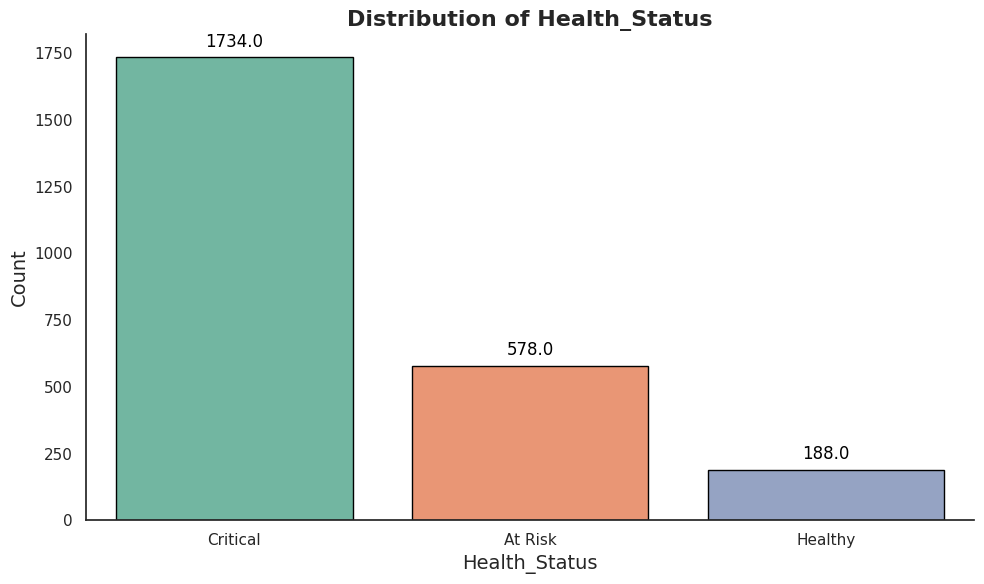

In [19]:
# check distribution of health status - target column
sns.set(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='Health_Status', palette='Set2', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title("Distribution of Health_Status", fontsize=16, fontweight='bold')
plt.xlabel("Health_Status", fontsize=14)
plt.ylabel("Count", fontsize=14)

sns.despine()

plt.tight_layout()
plt.show()

# Highly imbalanced, need to handle imbaalance by introducing SMOTE(Synthetic Minority Oversampling Technique)

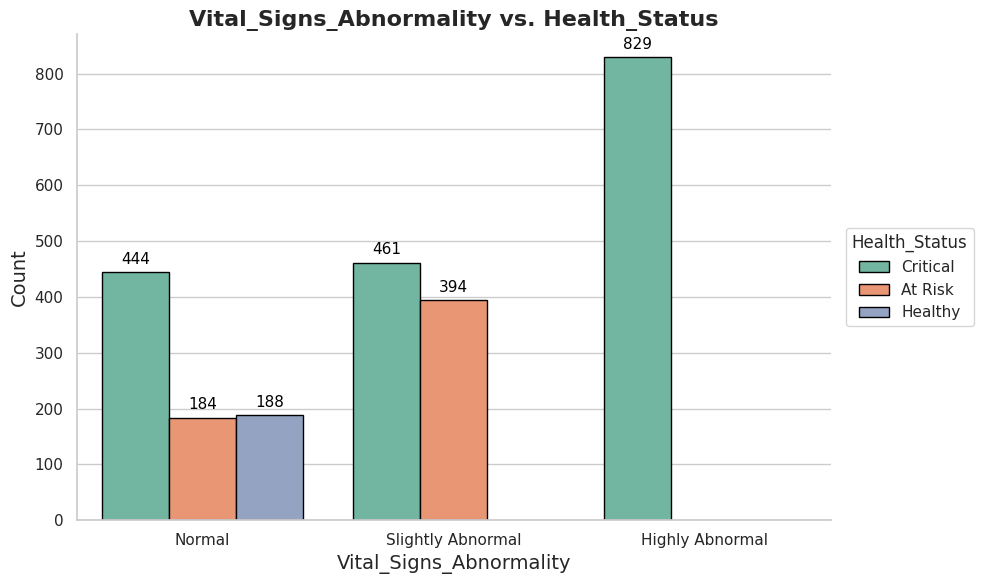

In [20]:
#Vital_Signs_Abnormality vs. Health_Status
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="Vital_Signs_Abnormality", hue="Health_Status", palette="Set2", edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 4),
                    textcoords='offset points')

plt.title("Vital_Signs_Abnormality vs. Health_Status", fontsize=16, fontweight='bold')
plt.xlabel("Vital_Signs_Abnormality", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title='Health_Status', title_fontsize=12, fontsize=11,
           loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

sns.despine()

plt.tight_layout()

plt.show()

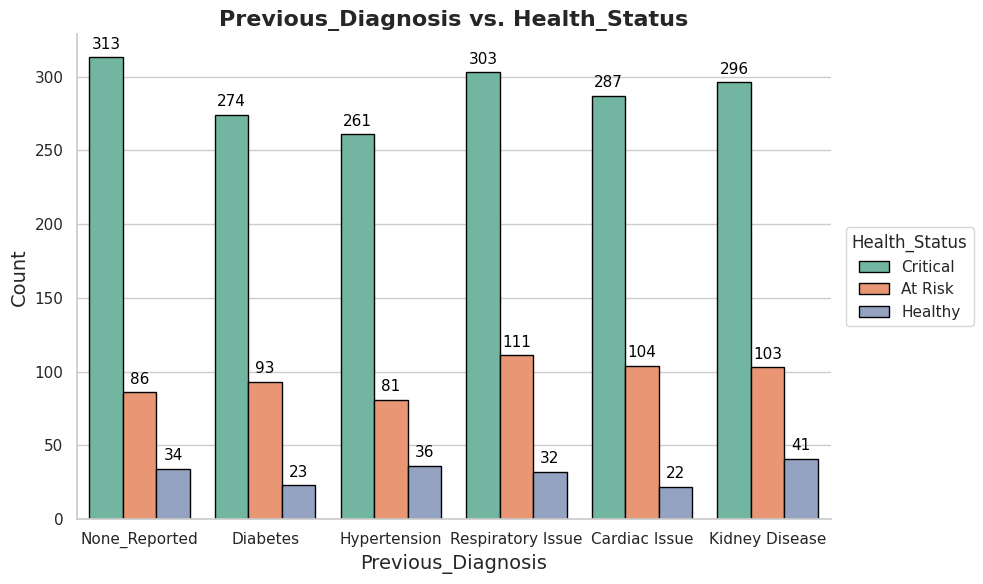

In [21]:
# Previous_diagnosis vs Health status
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="Previous_Diagnosis", hue="Health_Status", palette="Set2", edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 4),
                    textcoords='offset points')

plt.title("Previous_Diagnosis vs. Health_Status", fontsize=16, fontweight='bold')
plt.xlabel("Previous_Diagnosis", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title='Health_Status', title_fontsize=12, fontsize=11,
           loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

sns.despine()

plt.tight_layout()

plt.show()

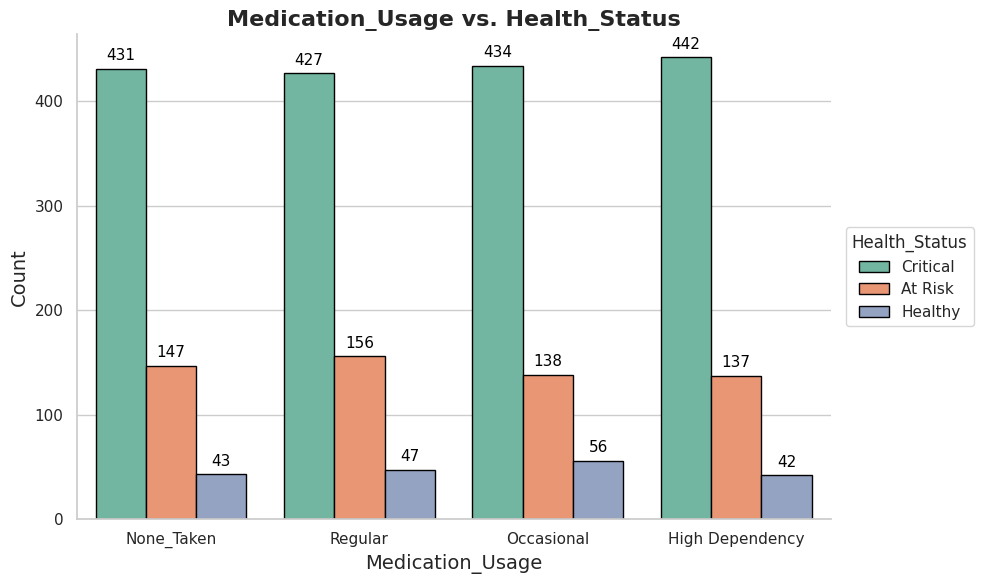

In [22]:
# Medication_Usage vs Health status
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="Medication_Usage", hue="Health_Status", palette="Set2", edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 4),
                    textcoords='offset points')

plt.title("Medication_Usage vs. Health_Status", fontsize=16, fontweight='bold')
plt.xlabel("Medication_Usage", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title='Health_Status', title_fontsize=12, fontsize=11,
           loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

sns.despine()

plt.tight_layout()

plt.show()

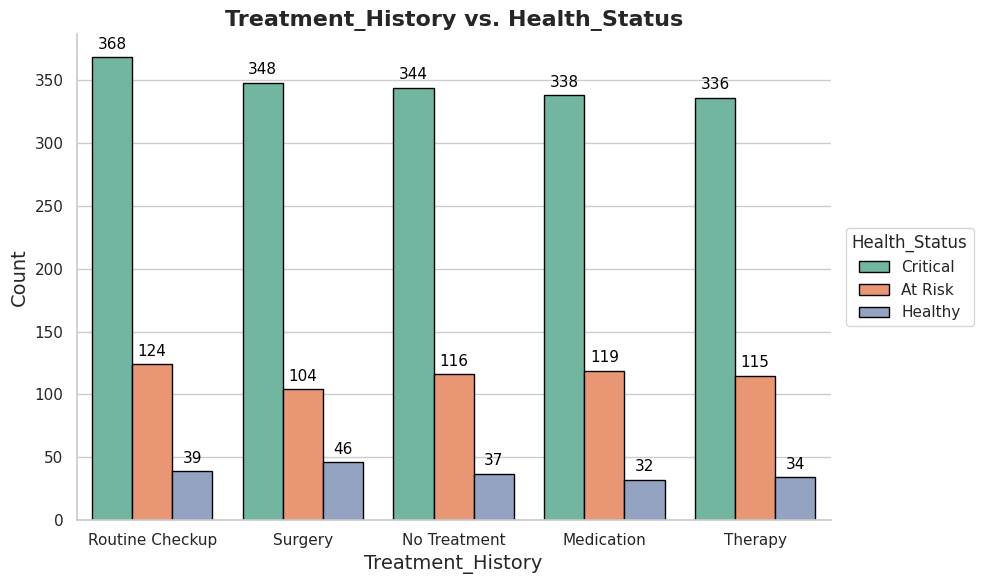

In [23]:
# Treatment_History vs Health status
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x="Treatment_History", hue="Health_Status", palette="Set2", edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=11, color='black', xytext=(0, 4),
                    textcoords='offset points')

plt.title("Treatment_History vs. Health_Status", fontsize=16, fontweight='bold')
plt.xlabel("Treatment_History", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.legend(title='Health_Status', title_fontsize=12, fontsize=11,
           loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

sns.despine()

plt.tight_layout()

plt.show()

### Numerical Columns :
###  ['Patient_Age', 'Heart_Rate_BPM', 'Systolic_BP', 'Diastolic_BP', 'Oxygen_Saturation_%', 'Body_Temperature_C', 'Blood_Glucose_mg/dL']

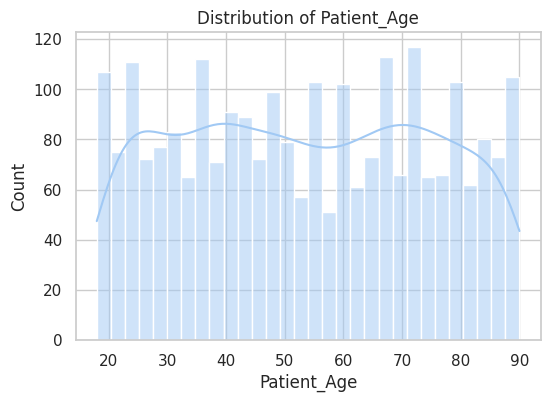

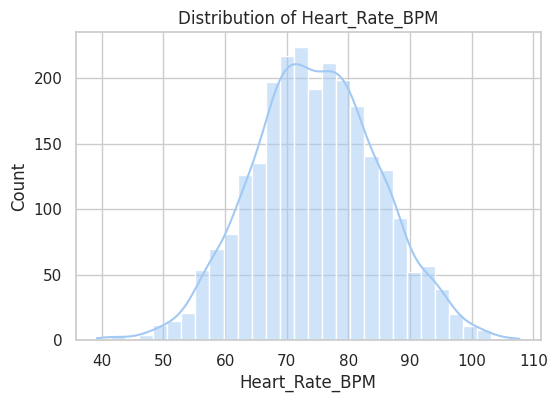

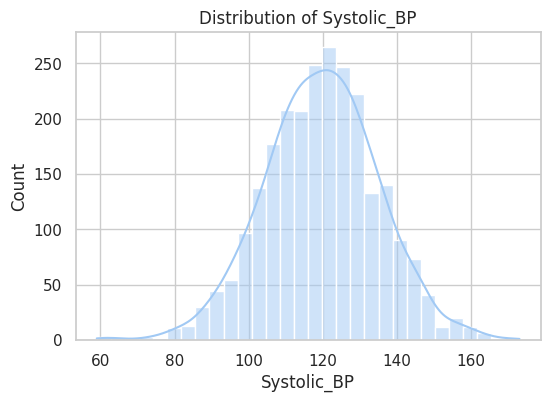

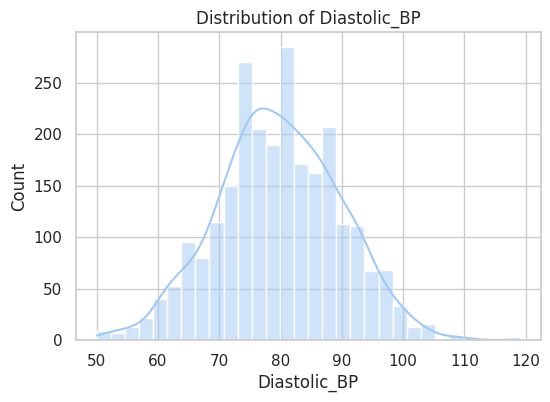

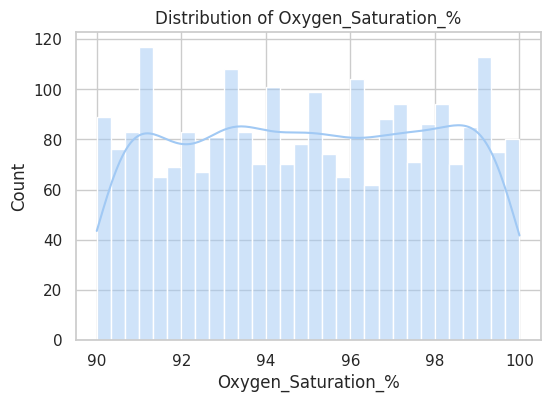

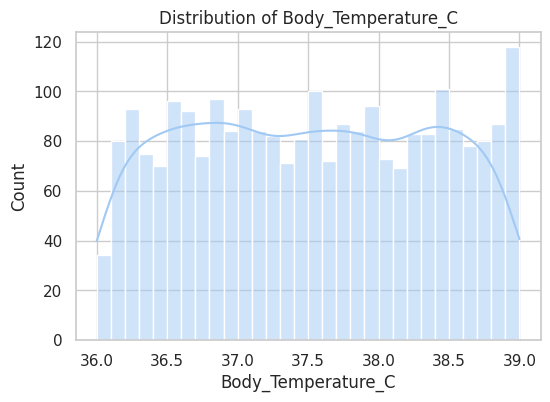

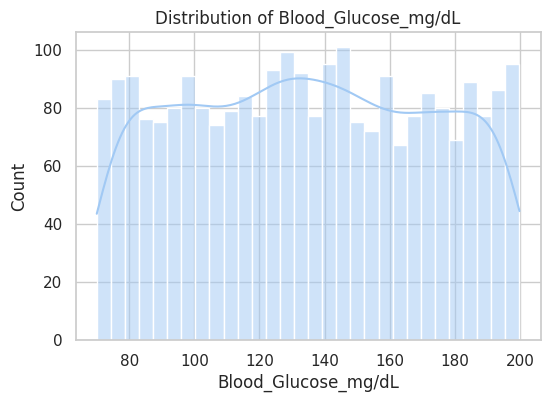

In [24]:
# Distribution Plots: Visualize how each feature is spread:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


In [25]:
# # Boxplots by Health Status: See how vital signs differ across classes:
# for col in numerical_cols:
#     plt.figure(figsize=(6,4))
#     sns.boxplot(x='Health_Status', y=col, data=df, palette='Set2')
#     plt.title(f'{col} by Health Status')
#     plt.show()


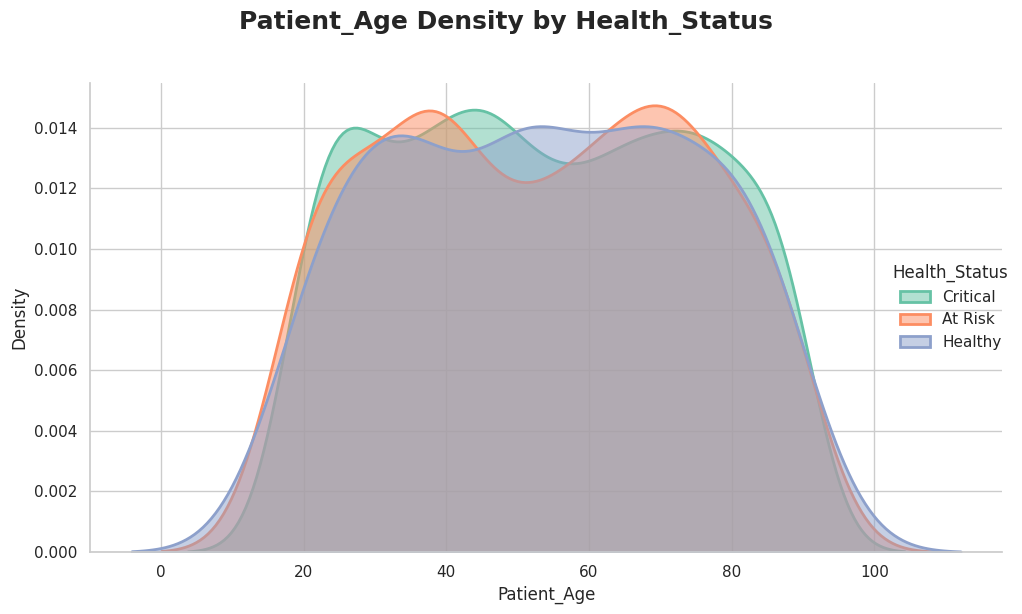

In [26]:
# Patient Age by Density
g = sns.FacetGrid(df, hue="Health_Status", height=6, aspect=1.5, palette='Set2')
g.map(sns.kdeplot, "Patient_Age", fill=True, alpha=0.5, linewidth=2)
g.add_legend(title="Health_Status")
g.set_axis_labels("Patient_Age", "Density")
g.fig.suptitle("Patient_Age Density by Health_Status", fontsize=18, fontweight='bold', y=1.02)
sns.despine()
plt.tight_layout()
plt.show()

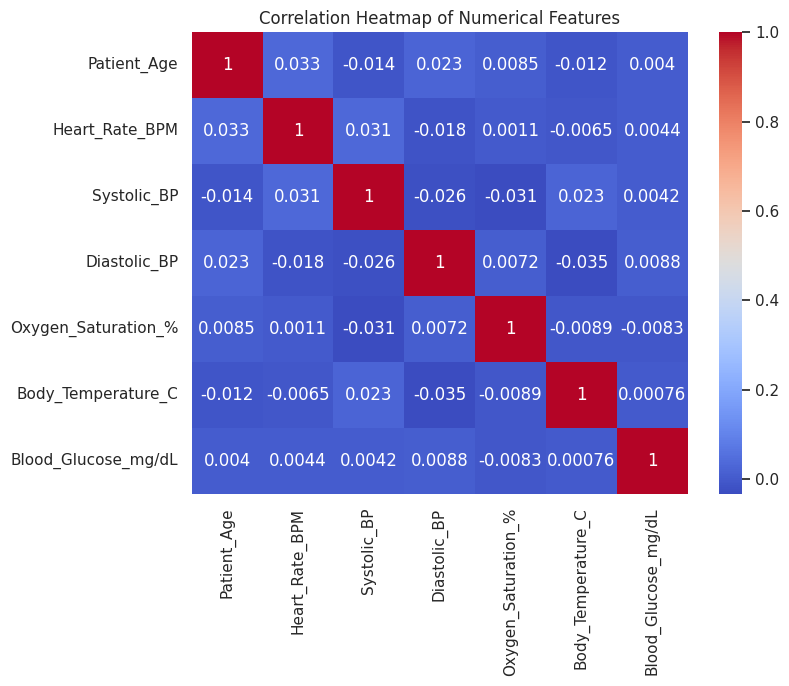

In [27]:
# Correlation Heatmap:  relationships among numeric features:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## most of the features arent highly correlated

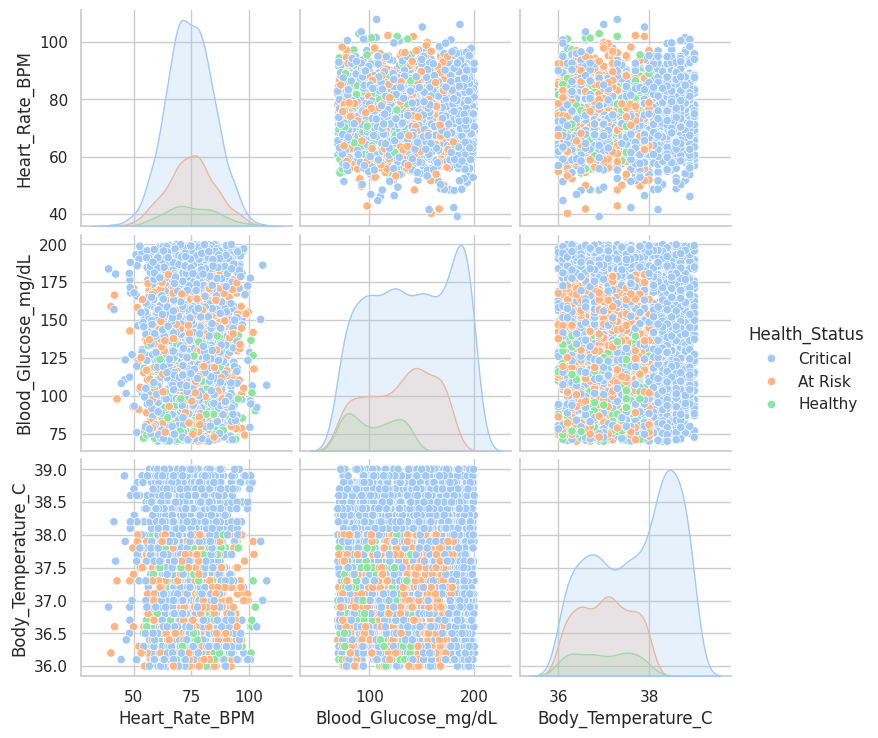

In [28]:
sns.pairplot(df, vars=['Heart_Rate_BPM', 'Blood_Glucose_mg/dL', 'Body_Temperature_C'], hue='Health_Status')
plt.show()


Insights:

- Higher Heart Rate, Blood Glucose, and Body Temperature often correspond to Critical cases.

- Healthy patients tend to cluster in the lower-normal range of these features.

- There’s overlap, meaning these features alone aren’t enough — but they show important trends.

In [29]:
# Age brackets just for EDA

bn=[18,25,65,100]
label=['Young Adults(18-24)','Adults(25-64)','Seniors(>65)']
df['Age Group']=pd.cut(df['Patient_Age'],bins=bn,labels=label,right=False)

age_counts = df['Age Group'].value_counts().sort_index()
age_counts

,count
Age Group,
Young Adults(18-24),252
Adults(25-64),1361
Seniors(>65),887


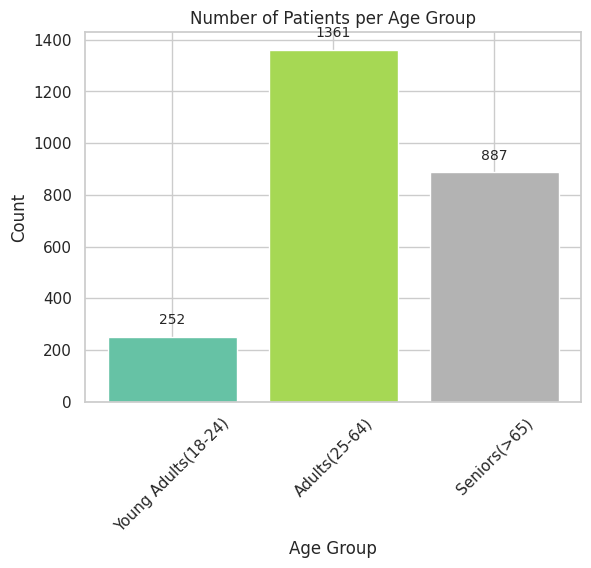

In [30]:
import matplotlib.cm as cm
colors = cm.Set2(np.linspace(0, 1, len(age_counts)))

plt.bar(age_counts.index, age_counts.values, color=colors)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Number of Patients per Age Group')
plt.xticks(rotation=45)  # rotate labels if needed
for i, v in enumerate(age_counts.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=10)  # adds count above bar
plt.show()

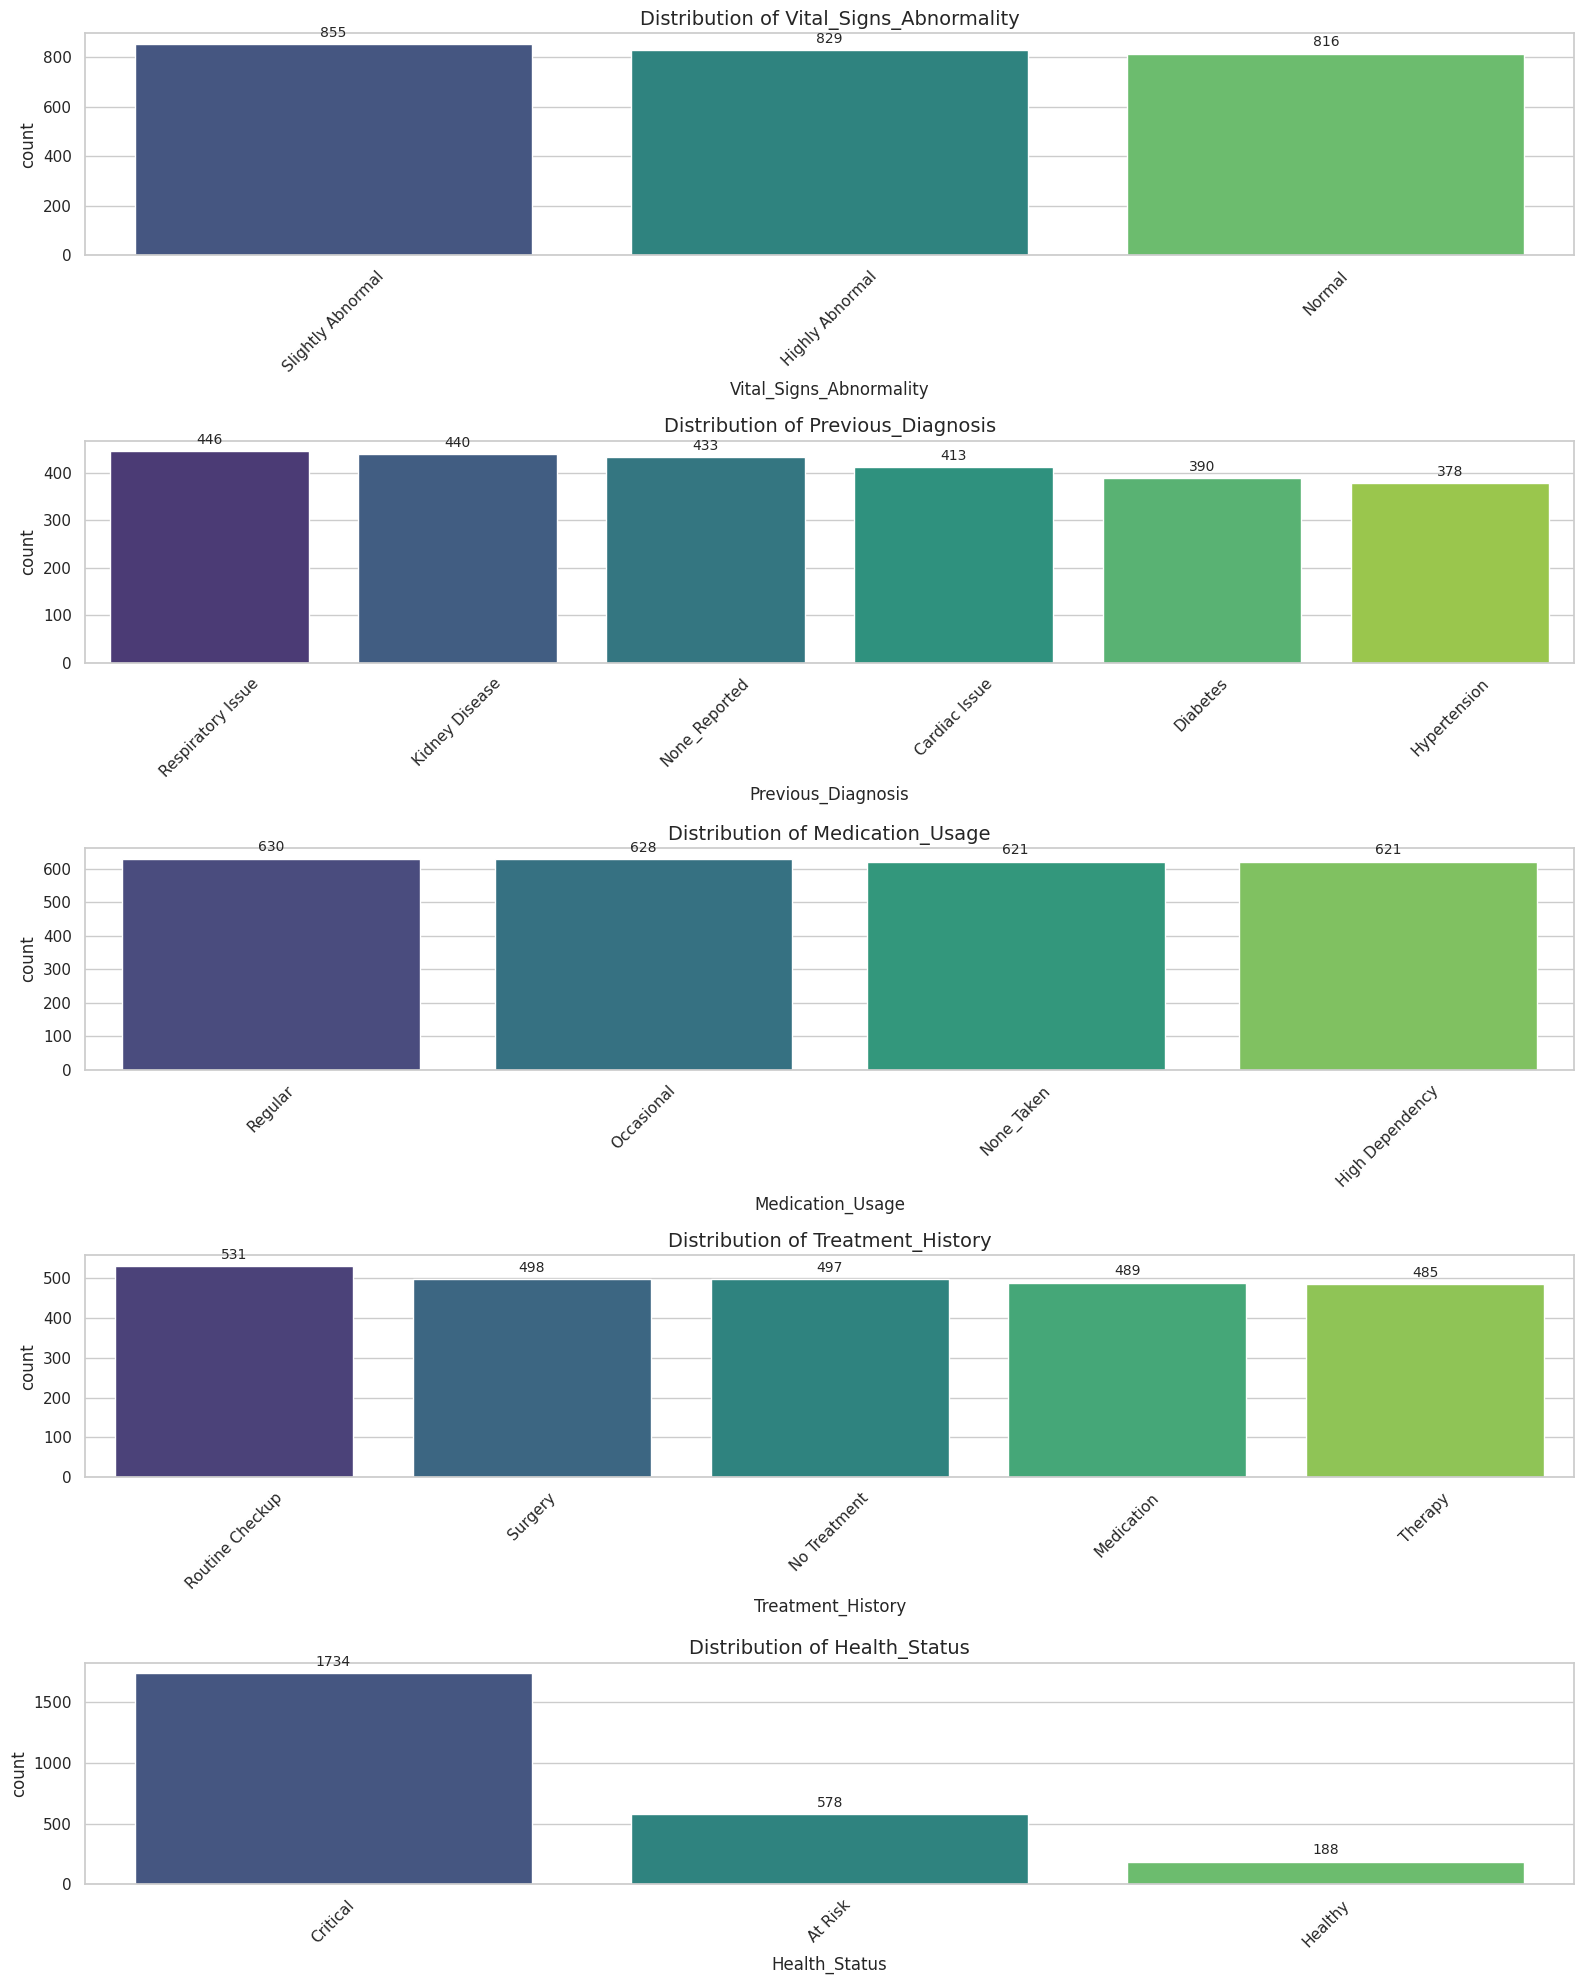

In [31]:
# shows distribution of all columns
plt.figure(figsize=(16, len(categorical_cols) * 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xticks(rotation=45)

    # Add data labels above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [32]:
df.drop(columns="Age Group", inplace=True)

In [33]:
# Pickle format preserves the data types and structure better than CSV so saving it
import joblib
from google.colab import drive
drive.mount('/content/drive')

joblib.dump(df, '/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/cleaned_IOMT_data.pkl')

#df = joblib.load('cleaned_laptop_data.pkl') to load

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/cleaned_IOMT_data.pkl']

Insights:
- Feature columns seem to be balanced
- However target is highly imbalanced
- class imbalance in the target variable (not in features).

➡️ This imbalance matters a lot because the model learns to predict the target.
If Not fixed, the model will become biased toward predicting “Critical” since that’s the majority class.


## Preparing Input Features and Target Variable

In [34]:
# load the dataset
import joblib
from google.colab import drive
drive.mount('/content/drive')
df = joblib.load('/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/cleaned_IOMT_data.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#extracting X and y
X = df.drop('Health_Status', axis=1)
y = df['Health_Status']

In [36]:
X.head()

,Patient_Age,Vital_Signs_Abnormality,Previous_Diagnosis,Medication_Usage,Treatment_History,Heart_Rate_BPM,Systolic_BP,Diastolic_BP,Oxygen_Saturation_%,Body_Temperature_C,Blood_Glucose_mg/dL
0,35,Normal,None_Reported,None_Taken,Routine Checkup,77.790413,127,78,96.0,38.2,90.3
1,72,Slightly Abnormal,Diabetes,None_Taken,Routine Checkup,69.748302,135,74,93.0,36.6,138.2
2,88,Slightly Abnormal,Diabetes,None_Taken,Surgery,67.966562,94,74,91.4,37.8,108.0
3,83,Slightly Abnormal,Hypertension,Regular,Surgery,80.977205,87,73,95.9,37.5,76.0
4,58,Normal,Respiratory Issue,Occasional,Routine Checkup,68.997461,102,83,99.5,36.2,195.5


In [37]:
y.head()

,Health_Status
0,Critical
1,At Risk
2,Critical
3,At Risk
4,Critical


categorical columns must be encoded(One Hot encoding) before SMOTE for data balancing, because SMOTE works only with numerical values.

## Model Training

4 models - logistic regression, Gradient Boost, Decision Tree and SVM

In [38]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  # important for SMOTE integration
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

print("Categorical:", list(categorical_cols))
print("Numeric:", list(numeric_cols))


Categorical: ['Vital_Signs_Abnormality', 'Previous_Diagnosis', 'Medication_Usage', 'Treatment_History']
Numeric: ['Patient_Age', 'Heart_Rate_BPM', 'Systolic_BP', 'Diastolic_BP', 'Oxygen_Saturation_%', 'Body_Temperature_C', 'Blood_Glucose_mg/dL']


In [40]:
# Encode target labels (y) - [0,1,0] [Healthy,At risk, Critical]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([1, 0, 1, ..., 1, 0, 1])

In [41]:
# Split before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# stratify helps in making sure equal no of samples are split as data is imbalanced

In [42]:
X_train.shape, y_train.shape

((1875, 11), (1875,))

In [43]:
X_test.shape, y_test.shape

((625, 11), (625,))

Preprocessing pipeline

You’ll encode categorical and scale numerical features.

In [44]:
# Preprocessor (OneHot for categorical + scaling for numerical)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

In [45]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),

    'Decision Tree': DecisionTreeClassifier(
        max_depth=5,              # Limit tree depth
        min_samples_split=20,     # Require more samples to split
        min_samples_leaf=10,      # Require more samples in leaf nodes
        max_features='sqrt',      # Limit features considered
        random_state=42,
        class_weight='balanced'
    ),

    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,         # Reduce from 150
        learning_rate=0.01,       # Lower learning rate
        max_depth=3,              # Already good
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.7,            # Lower subsample ratio
        max_features='sqrt',
        random_state=42
    ),

    'SVM': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
}

### adding SMOTE for GB and remaining class_weight for the imbalance

In [46]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Build pipeline with SMOTE
results = {}

print("\n" + "="*70)
print("MODEL TRAINING AND EVALUATION")
print("="*70)

# Train & evaluate each model with SMOTE and preprocessing
for name, classifier in models.items():
    print(f"\n{'='*70}")
    print(f"Training {name}...")
    print(f"{'='*70}")

    model = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Weighted F1-score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    results[name] = {'Accuracy': acc, 'F1 Score': f1}

# Display summary results
print("\n" + "="*70)
print("MODEL PERFORMANCE SUMMARY")
print("="*70)
results_df = pd.DataFrame(results).T.sort_values(by='F1 Score', ascending=False)
print(results_df)


MODEL TRAINING AND EVALUATION

Training Logistic Regression...
Accuracy: 0.7856
Weighted F1-score: 0.7959

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.61      0.72      0.66       145
    Critical       0.93      0.79      0.86       433
     Healthy       0.51      0.96      0.67        47

    accuracy                           0.79       625
   macro avg       0.68      0.82      0.73       625
weighted avg       0.83      0.79      0.80       625


Training Decision Tree...
Accuracy: 0.7584
Weighted F1-score: 0.7938

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.69      0.70      0.70       145
    Critical       1.00      0.76      0.87       433
     Healthy       0.28      0.89      0.43        47

    accuracy                           0.76       625
   macro avg       0.66      0.79      0.66       625
weighted avg       0.88      0.76      0.79       625


Training Gra

## Cross validating and rechecking

In [48]:
from sklearn.model_selection import cross_val_score

results = {}
trained_models = {}  # Store trained models

print("\n" + "="*70)
print("MODEL TRAINING AND EVALUATION")
print("="*70)

for name, classifier in models.items():
    print(f"\n{'='*70}")
    print(f"Training {name}...")
    print(f"{'='*70}")

    model = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)
    ])

    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    # cross-validation ensures you get a stable measure of performance before final training.

    # Train on full training set
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test F1-score: {test_f1:.4f}")
    print(f"Gap (CV vs Test F1): {abs(cv_scores.mean() - test_f1):.4f}")
    print(f"Gap (Train vs Test Acc): {abs(train_acc - test_acc):.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=le.classes_))

    # Store results with consistent keys
    results[name] = {
        'CV F1': cv_scores.mean(),
        'CV F1 Std': cv_scores.std(),
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Test F1': test_f1,
        'CV-Test Gap': abs(cv_scores.mean() - test_f1),
        'Train-Test Gap': abs(train_acc - test_acc)
    }
    # these “gaps” are useful for diagnosing data leakage or overfitting.

    # Store the trained model
    trained_models[name] = model

# Compare all models
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('Test F1', ascending=False)  # Sort by Test F1, not Accuracy
print("\n", results_df)


MODEL TRAINING AND EVALUATION

Training Logistic Regression...
CV F1-Score: 0.8199 (+/- 0.0104)
Train Accuracy: 0.8155
Test Accuracy: 0.7856
Test F1-score: 0.7959
Gap (CV vs Test F1): 0.0239
Gap (Train vs Test Acc): 0.0299

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.61      0.72      0.66       145
    Critical       0.93      0.79      0.86       433
     Healthy       0.51      0.96      0.67        47

    accuracy                           0.79       625
   macro avg       0.68      0.82      0.73       625
weighted avg       0.83      0.79      0.80       625


Training Decision Tree...
CV F1-Score: 0.7843 (+/- 0.0193)
Train Accuracy: 0.7696
Test Accuracy: 0.7584
Test F1-score: 0.7938
Gap (CV vs Test F1): 0.0094
Gap (Train vs Test Acc): 0.0112

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.69      0.70      0.70       145
    Critical       1.00      0.76      0.87       4

  - Gap 1: CV vs Test F1 - This gap tells you how well your cross-validation estimate matched real-world performance.

  - Gap 2: Train vs Test Accuracy - tells about overfitting

     - both values must be smaller

Train-Test Gap > 0.10: Severe overfitting
CV-Test Gap > 0.05: Model doesn't generalize well
Both gaps < 0.05: Good generalization

In [49]:
results_df.round(4)

,CV F1,CV F1 Std,Train Accuracy,Test Accuracy,Test F1,CV-Test Gap,Train-Test Gap
Gradient Boosting,0.9422,0.0103,0.9547,0.9328,0.9388,0.0034,0.0219
SVM,0.9112,0.0035,0.9845,0.9040,0.9044,0.0068,0.0805
Logistic Regression,0.8199,0.0104,0.8155,0.7856,0.7959,0.0239,0.0299
Decision Tree,0.7843,0.0193,0.7696,0.7584,0.7938,0.0094,0.0112


In [50]:
# Find best model based on Test F1 and low overfitting
best_model_name = results_df.index[0]
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Train Accuracy: {results_df.loc[best_model_name, 'Train Accuracy']:.4f}")
print(f"   Test Accuracy: {results_df.loc[best_model_name, 'Test Accuracy']:.4f}")
print(f"   Test F1: {results_df.loc[best_model_name, 'Test F1']:.4f}")
print(f"   CV-Test Gap: {results_df.loc[best_model_name, 'CV-Test Gap']:.4f}")
print(f"   Train-Test Gap: {results_df.loc[best_model_name, 'Train-Test Gap']:.4f}")

# Get the best trained model
best_model = trained_models[best_model_name]


🏆 Best Model: Gradient Boosting
   Train Accuracy: 0.9547
   Test Accuracy: 0.9328
   Test F1: 0.9388
   CV-Test Gap: 0.0034
   Train-Test Gap: 0.0219


## Evaluate model

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
y_pred = best_model.predict(X_test)

# Decode predictions back to original labels
y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

     At Risk       0.96      0.81      0.88       145
    Critical       1.00      0.97      0.98       433
     Healthy       0.56      1.00      0.72        47

    accuracy                           0.93       625
   macro avg       0.84      0.93      0.86       625
weighted avg       0.96      0.93      0.94       625



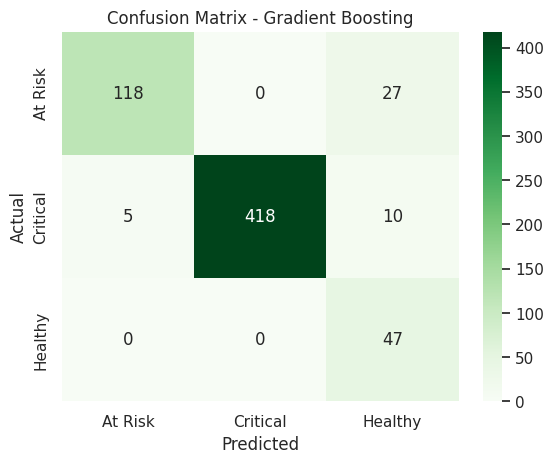

In [52]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


## Checking the Top 10 Feature Importances  of Gradient Boosting

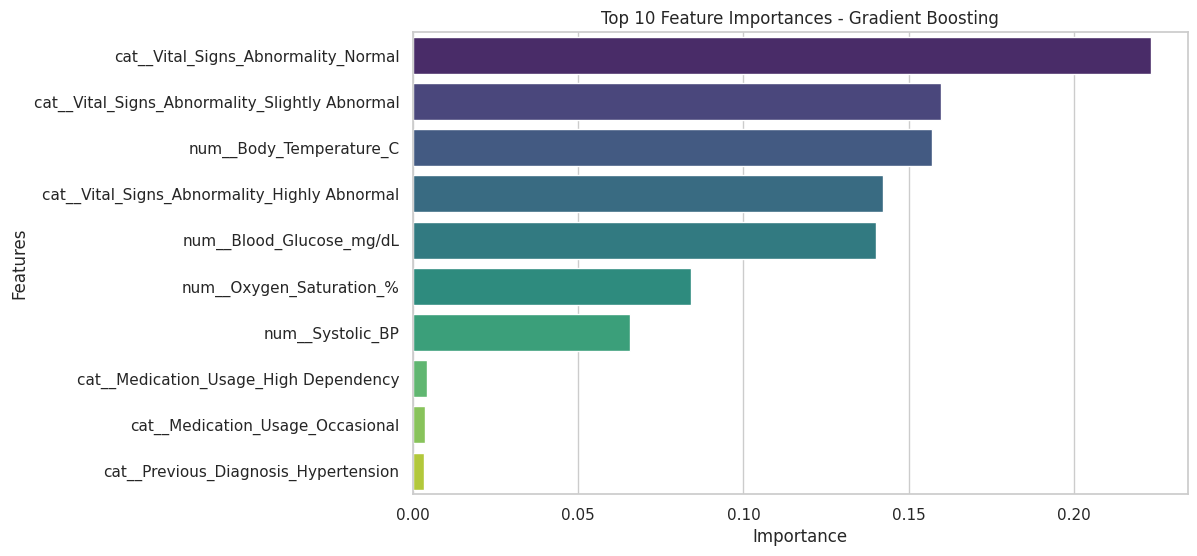

In [53]:
# feature importance
import pandas as pd
import numpy as np

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out() # 1. Get feature names after preprocessing
importances = best_model.named_steps['classifier'].feature_importances_  # 2️⃣ Get feature importances from the classifier
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False) #3️⃣ Combine them into a pandas Series for easy viewing

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette='viridis')
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## Save model

In [58]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/IoMT_health_model.pkl')


['/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/IoMT_health_model.pkl']

## Prediction with Interactive user Input

In [59]:
import joblib
import pandas as pd

# Load your trained model
model = joblib.load('/content/drive/MyDrive/OdinSchool/ML/IoMT_MLproject/IoMT_health_model.pkl')


Interactive user input

In [ ]:
# Collect patient data interactively
patient_data = {
    'Patient_Age': int(input("Enter patient age: ")),
    'Vital_Signs_Abnormality': input("Vital signs (Normal / Slightly Abnormal / Highly Abnormal): "),
    'Previous_Diagnosis': input("Previous diagnosis (Diabetes / Hypertension / Cardiac Issue / Respiratory Issue / Kidney Disease / No_Diagnosis): "),
    'Medication_Usage': input("Medication usage (None / Occasional / Regular / High Dependency): "),
    'Treatment_History': input("Treatment history (No Treatment / Routine Checkup / Medication / Surgery / Therapy): "),
    'Heart_Rate_BPM': float(input("Heart rate (BPM): ")),
    'Systolic_BP': int(input("Systolic BP (mmHg): ")),
    'Diastolic_BP': int(input("Diastolic BP (mmHg): ")),
    'Oxygen_Saturation_%': float(input("Oxygen saturation (%): ")),
    'Body_Temperature_C': float(input("Body temperature (°C): ")),
    'Blood_Glucose_mg/dL': float(input("Blood glucose (mg/dL): "))
}

# Convert to DataFrame
input_df = pd.DataFrame([patient_data])


dummy data for demo

In [ ]:
input_df = pd.DataFrame([{
    'Patient_Age': 56,
    'Vital_Signs_Abnormality': 'Slightly Abnormal',
    'Previous_Diagnosis': 'Hypertension',
    'Medication_Usage': 'Regular',
    'Treatment_History': 'Medication',
    'Heart_Rate_BPM': 92,
    'Systolic_BP': 140,
    'Diastolic_BP': 90,
    'Oxygen_Saturation_%': 96.0,
    'Body_Temperature_C': 37.4,
    'Blood_Glucose_mg/dL': 135.0
}])

Predict the health status

In [ ]:
# Predict health status
prediction = model.predict(input_df)[0]
decoded_prediction = le.inverse_transform([prediction])[0]

print("🩺 Predicted Health Status:", decoded_prediction)

🩺 Predicted Health Status: At Risk


Show probability for each class

In [ ]:
# Get predicted probabilities
proba = model.predict_proba(input_df)[0]

# Decode class labels from numeric → original category names
decoded_classes = le.inverse_transform(model.classes_)

# Build and sort results
results = pd.DataFrame({
    'Health_Status': decoded_classes,
    'Probability': proba
}).sort_values(by='Probability', ascending=False)

print("\n📊 Prediction Probabilities:")
print(results)



📊 Prediction Probabilities:
  Health_Status  Probability
0       At Risk     0.643788
1      Critical     0.208665
2       Healthy     0.147547


GUI like interface

In [56]:
import gradio as gr
import pandas as pd

def predict_health(Patient_Age, Vital_Signs_Abnormality, Previous_Diagnosis, Medication_Usage, Treatment_History,
                   Heart_Rate_BPM, Systolic_BP, Diastolic_BP, Oxygen_Saturation, Body_Temperature, Blood_Glucose):

    # Prepare input dataframe
    input_df = pd.DataFrame([{
        'Patient_Age': Patient_Age,
        'Vital_Signs_Abnormality': Vital_Signs_Abnormality,
        'Previous_Diagnosis': Previous_Diagnosis,
        'Medication_Usage': Medication_Usage,
        'Treatment_History': Treatment_History,
        'Heart_Rate_BPM': Heart_Rate_BPM,
        'Systolic_BP': Systolic_BP,
        'Diastolic_BP': Diastolic_BP,
        'Oxygen_Saturation_%': Oxygen_Saturation,
        'Body_Temperature_C': Body_Temperature,
        'Blood_Glucose_mg/dL': Blood_Glucose
    }])

    # Predict encoded label
    pred_encoded = model.predict(input_df)[0]

    # Decode it back to original label using LabelEncoder
    pred_label = le.inverse_transform([pred_encoded])[0]

    return f"🩺 Predicted Health Status: {pred_label}"

interface = gr.Interface(
    fn=predict_health,
    inputs=[
        gr.Number(label="Patient Age"),
        gr.Radio(["Normal","Slightly Abnormal","Highly Abnormal"], label="Vital Signs"),
        gr.Radio(["No_Diagnosis","Diabetes","Hypertension","Cardiac Issue","Respiratory Issue","Kidney Disease"], label="Previous Diagnosis"),
        gr.Radio(["None","Occasional","Regular","High Dependency"], label="Medication Usage"),
        gr.Radio(["No Treatment","Routine Checkup","Medication","Surgery","Therapy"], label="Treatment History"),
        gr.Number(label="Heart Rate (BPM)"),
        gr.Number(label="Systolic BP"),
        gr.Number(label="Diastolic BP"),
        gr.Number(label="Oxygen Saturation (%)"),
        gr.Number(label="Body Temperature (°C)"),
        gr.Number(label="Blood Glucose (mg/dL)")
    ],
    outputs=gr.Textbox(label="Predicted Health Status"),
    title="IoMT Healthcare Risk Prediction"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65a765ee25dc233dca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
input_df = pd.DataFrame([{ -- at risk
    'Patient_Age': 56,
    'Vital_Signs_Abnormality': 'Slightly Abnormal',
    'Previous_Diagnosis': 'Hypertension',
    'Medication_Usage': 'Regular',
    'Treatment_History': 'Medication',
    'Heart_Rate_BPM': 92,
    'Systolic_BP': 140,
    'Diastolic_BP': 90,
    'Oxygen_Saturation_%': 96.0,
    'Body_Temperature_C': 37.4,
    'Blood_Glucose_mg/dL': 135.0
}])

input_df = pd.DataFrame([{   -- healthy
    'Patient_Age': 35,                              # mid-age adult
    'Vital_Signs_Abnormality': 'Normal',            # normal vital signs
    'Previous_Diagnosis': 'No_Diagnosis',           # no known condition
    'Medication_Usage': 'None',                     # not taking medication
    'Treatment_History': 'Routine Checkup',         # regular health visits
    'Heart_Rate_BPM': 72,                           # normal resting HR (60–100)
    'Systolic_BP': 118,                             # normal systolic (90–120)
    'Diastolic_BP': 76,                             # normal diastolic (60–80)
    'Oxygen_Saturation_%': 98.0,                    # normal SpO2 (95–100%)
    'Body_Temperature_C': 36.7,                     # normal temperature (36.5–37.2)
    'Blood_Glucose_mg/dL': 90.0                     # normal fasting glucose (70–99)
}])


Dataset from https://www.kaggle.com/datasets/zyan1999/iomt-healthcare-monitoring-and-security-dataset